In [40]:
%run -i 'cosim_import.py'

1.7.2.post291.dev0+gdb86c46b
2.9.0


<Figure size 640x480 with 0 Axes>

In [41]:
caseH = 18
# --- EV Aggregator ---
sse = ev_ssm(ts=caseH, N=50000, step=1, tp=40,
             lr=0.1, lp=60, seed=2022, name="EVA")
sse.load_A("Aest.csv")

# --- ANDES case ---
dir_path = os.path.abspath('..')
case_path = '/case/ieee39_ev2.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

# Set output mode as 'manual', turn off TDS progress bar
ssa.TDS.config.save_mode = 'manual'
ssa.TDS.config.no_tqdm = 1

# Set load as constant load.
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

# Turn on ``numba`` can accelerate TDS.
ssa.config.numba = 1

ssa.PFlow.run()

EVA: ts=18[H], 50000 EVs, Total Q=434.64 MWh
Online 14481, Q=361.83 MWh, SoC=0.7687
Power(MW): Pt=-39.9433, Pc=-39.9433, Pd=-0.0
Ctrl: 0=7778; 1=6703; 
EVA: Load A from Aest.csv.
Working directory: "/home/jwang175/andes/jwang/notes"
> Loaded config from file "/home/jwang175/.andes/andes.rc"
> Reloaded generated Python code of module "pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 6 processes.


Saved generated pycode to "/home/jwang175/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.3281 seconds.
Parsing input file "/home/jwang175/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.1325 seconds.
ACEc <1> added BusFreq <BusFreq_11> linked to bus <1>
System internal structure set up in 0.0753 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1225 seconds.
0: |F(x)| = 7.561249598
1: |F(x)| = 2.91832864
2: |F(x)| = 0.1315600782
3: |F(x)| = 0.00037239625
4: |F(x)| = 4.458893255e-09
Converged in 5 iterations in 0.0157 seconds.


True

In [42]:
ssa.TDS.config.tf = 2
ssa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-2 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Numba compilation initiated with caching.
GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.014  | 0.001
 GENROU_3  | 0.018  | 0.003
 GENROU_4  | 0.013  | 0.001
 GENROU_5  | 0.014  | 0.001
 GENROU_7  | 0.015  | 0.002
 GENROU_8  | 0.015  | 0.006
 GENROU_9  | 0.009  | 0.001
 GENROU_10 | 0.013  | 0.000


Initialization for dynamics completed in 0.5851 seconds.
Initialization was successful.
Simulation to t=2.00 sec completed in 0.1082 seconds.


True

In [43]:
ssa.DG.set(src='Pext0', attr='v', value=1, idx=ssa.EV2.idx.v)
ssa.TurbineGov.set(src='paux0', attr='v', value=1, idx='TGOV1_1')
ssa.TDS.config.tf = 4
ssa.TDS.run()

ssa.DG.set(src='Pext0', attr='v', value=2, idx=ssa.EV2.idx.v)
ssa.TurbineGov.set(src='paux0', attr='v', value=2, idx='TGOV1_1')
ssa.TDS.config.tf = 6
ssa.TDS.run()

ssa.DG.set(src='Pext0', attr='v', value=0, idx=ssa.EV2.idx.v)
ssa.TurbineGov.set(src='paux0', attr='v', value=0, idx='TGOV1_1')
ssa.TDS.config.tf = 20
ssa.TDS.run()

Simulation to t=4.00 sec completed in 0.3512 seconds.
Simulation to t=6.00 sec completed in 0.3906 seconds.
Simulation to t=20.00 sec completed in 2.0783 seconds.


True

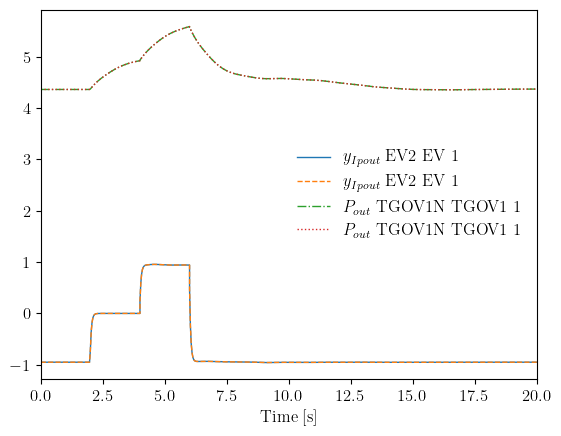

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [44]:
ssa.TDS.plt.plot([ssa.EV2.Ipout_y, ssa.TGOV1N.pout], a=[0, 0])